In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from pathlib import Path
import seaborn as sns
import pandas as pd

In [2]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', serif='Times')

In [3]:
name = ''
name += '_cpc'
name += '_alexnet'
name += f'_{"1"}'
keyword = 'camera'

In [4]:
def readSimilarity(fn, column_name):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
#             print(row)
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                if keyword in row[1]:
                    val.append(float(row[ind]))
                
    return val

def readSimilarityOther(fn, column_name):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
#             print(row)
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                if keyword in row[1] and keyword not in row[2]:
                    val.append(float(row[ind]))
                
    return val

def readSimilarityFamiliar(fn, column_name):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
#             print(row)
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                if keyword in row[1]:
                    val.append(float(row[ind]))
                
    return val

def readSimilarityFamiliarExcluding(fn, column_name, exclude):
    
    val = []
    
    with open(fn, 'r') as file:
        csvreader = csv.reader(file)
        for n, row in enumerate(csvreader):
#             print(row)
            if n == 0:
                ind = np.where(np.asarray(row) == column_name)[0][0]
            else:
                flag = True
                for w in exclude: 
                    if w in row[3]: 
                        flag = False
                if keyword in row[1] and flag:
                    val.append(float(row[ind]))
                
    return val

In [5]:
palette = {}
data = []

In [6]:
# unseen->unseen
label_name = r'C: Camera audio -- Camera image'
palette[label_name] = 'tab:green'
unseen_to_unseen = readSimilarity(Path(f'me_analysis{name}.csv'), 'similarity_A')
data.extend([[label_name, v] for v in unseen_to_unseen])
label_name = r'E: Camera audio -- novel image (not camera)'
palette[label_name] = 'tab:blue'
mismatched_unseen_to_unseen = readSimilarityOther(Path(f'me_mismatched_analysis{name}.csv'), 'similarity_A')
data.extend([[label_name, v] for v in mismatched_unseen_to_unseen])

In [7]:
# unseen->seen
label_name = r'D: Camera audio -- familiar image'
palette[label_name] = 'tab:red'
unseen_to_seen = readSimilarityFamiliar(Path(f'me_analysis{name}.csv'), 'similarity_B')
data.extend([[label_name, v]  for v in unseen_to_seen])
# label_name = r'F: Camera audio -- familiar image excluding cat, clock and elephant'
# palette[label_name] = 'tab:orange'
# unseen_to_seen = readSimilarityFamiliarExcluding(Path(f'me_analysis{name}.csv'), 'similarity_B', ['cat', 'clock', 'elephant'])
# data.extend([[label_name, v]  for v in unseen_to_seen])

In [8]:
df = pd.DataFrame(data, columns=["label", "Similarity score"]
)

[Text(0, 0.5, '')]

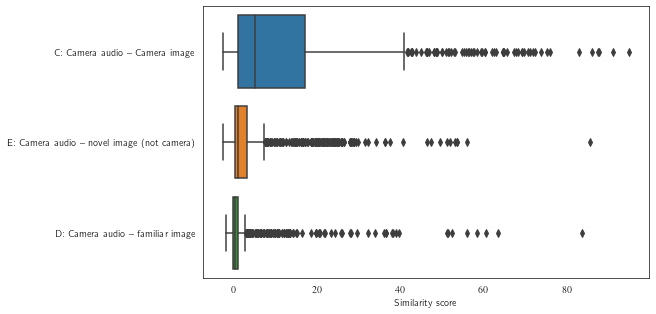

In [10]:
fig = plt.figure(figsize=(8, 5))
sns.set_style(style='white')
f = sns.boxplot(
    data=df, x="Similarity score", y="label",
    # common_norm=False, legend=True, linewidth=2.5, palette=palette, log_scale=False,
)

# f.set(xticklabels=[])
f.set(ylabel=None)